# Ejercicio 6 - Tema 12

**Enunciado**

ALIASING

> a) Suponga que se tiene una señal senoidal de 5Hz, alrededor de 200 ciclos;
dibuje 3 ciclos en su computadora.

>b) Suponga que esa señal se muestrea a una frecuencia de 7,3Hz. Dibuje los
puntos muestreados superpuestos al gráfico de la señal original.

>c) Usando la DFT dibuje los espectros de la señal original y de la señal submuestreada, empleando los puntos de muestra que se poseen.
Notando el efecto de aliasing. ¿Cuál es la frecuencia de la señal "alias"?

>d) Use Python para graficar sobre la señal original la señal de "alias".



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fft import fft, fftfreq, fftshift, ifft

## Apartado a

In [2]:
# Creamos una señal sinusoidal de 5 Hz con 200 ciclos

frecuencia_senial = 5  # Hz
cantidad_ciclos_senial = 200  # Hz

frecuencia_muestreo = frecuencia_senial * 20

cantidad_muestras_un_ciclo = 1/frecuencia_senial * frecuencia_muestreo

vector_tiempo = np.arange(
    start=0,
    stop=cantidad_ciclos_senial*1/frecuencia_senial,
    step=1/frecuencia_muestreo
)

senial = np.sin(2*np.pi*frecuencia_senial * vector_tiempo)

In [3]:
# Defino cantidad de ciclos a graficar

ciclos_a_graficar = 3
cantidad_muestras_tres_ciclos = math.ceil(cantidad_muestras_un_ciclo * ciclos_a_graficar)

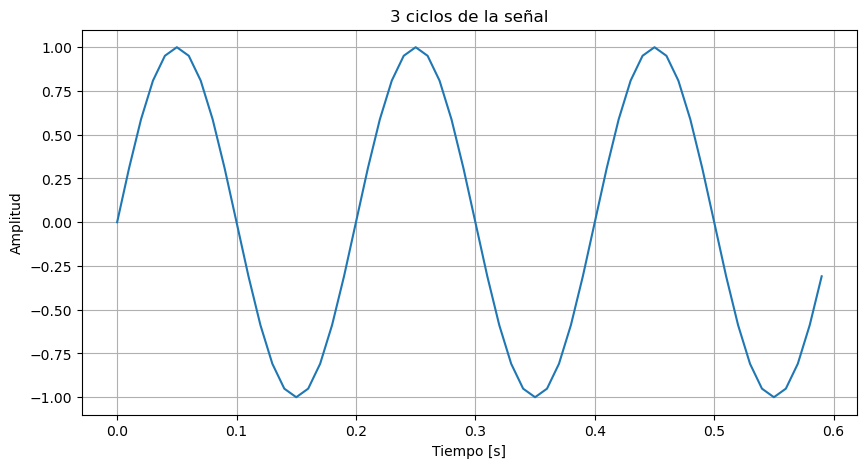

In [4]:
# Grafico los primero 3 ciclos de la señal

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title(f"{ciclos_a_graficar} ciclos de la señal")

plt.plot(
    vector_tiempo[:cantidad_muestras_tres_ciclos],
    senial[:cantidad_muestras_tres_ciclos]
)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

## Apartado b

In [5]:
# Cambiamos la frecuencia de muestreo original por la que dice el enunciado

frecuencia_muestreo_b = 7.3  # Hz

cantidad_muestras_un_ciclo_b = 1/frecuencia_senial * frecuencia_muestreo_b

vector_tiempo_b = np.arange(
    start=vector_tiempo[0],
    stop=vector_tiempo[-1],
    step=1/frecuencia_muestreo_b
)

senial_b = np.sin(2*np.pi*frecuencia_senial * vector_tiempo_b)

cantidad_muestras_tres_ciclos_b = math.ceil(cantidad_muestras_un_ciclo_b * ciclos_a_graficar)

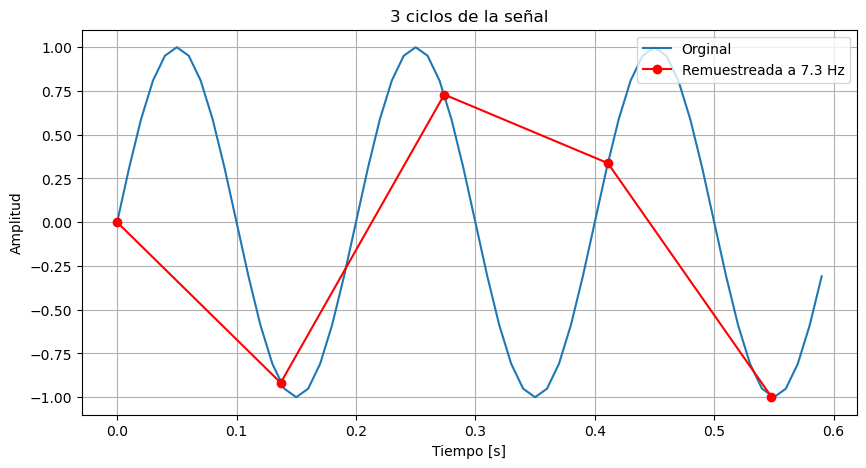

In [6]:
# Grafico los primero 3 ciclos de la señal original y la señal remuestreada

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title(f"{ciclos_a_graficar} ciclos de la señal")

plt.plot(
    vector_tiempo[:cantidad_muestras_tres_ciclos],
    senial[:cantidad_muestras_tres_ciclos],
    '-',
    vector_tiempo_b[:cantidad_muestras_tres_ciclos_b],
    senial_b[:cantidad_muestras_tres_ciclos_b],
    'ro-'
)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(['Orginal', f'Remuestreada a {frecuencia_muestreo_b} Hz'], loc='upper right')

plt.grid()
plt.show()

## Apartado c

In [7]:
senial_fft = fft(senial)
senial_b_fft = fft(senial_b)

senial_freqs = fftfreq(senial.shape[0], 1/frecuencia_muestreo)
senial_b_freqs = fftfreq(senial_b.shape[0], 1/frecuencia_muestreo_b)

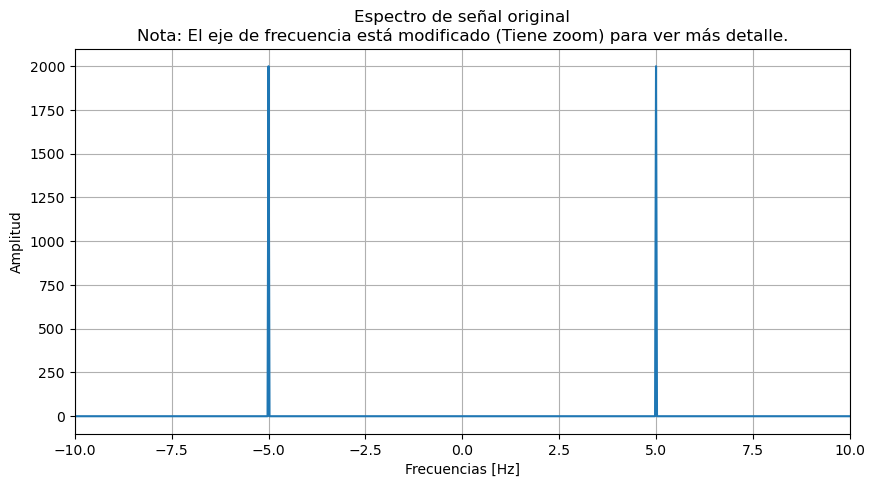

In [8]:
# Grafico el espectro de la señal original

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title(f"Espectro de señal original\nNota: El eje de frecuencia está modificado (Tiene zoom) para ver más detalle.")

plt.plot(fftshift(senial_freqs), fftshift(np.abs(senial_fft)))

plt.xlabel("Frecuencias [Hz]")
plt.ylabel("Amplitud")

plt.xlim(-2*frecuencia_senial, 2*frecuencia_senial)

plt.grid()
plt.show()

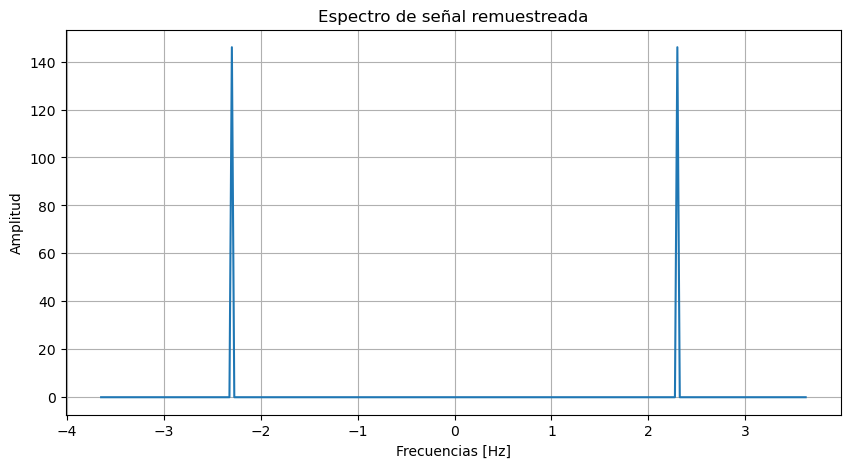

In [9]:
# Grafico el espectro de la señal remuestreada

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title(f"Espectro de señal remuestreada")

plt.plot(fftshift(senial_b_freqs), fftshift(np.abs(senial_b_fft)))

plt.xlabel("Frecuencias [Hz]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

Se puede observar que la frecuencia de la señal de alias es de aproximadamente 2.3 [Hz]

# Apartado d

In [10]:
senial_d = ifft(senial_b_fft).real

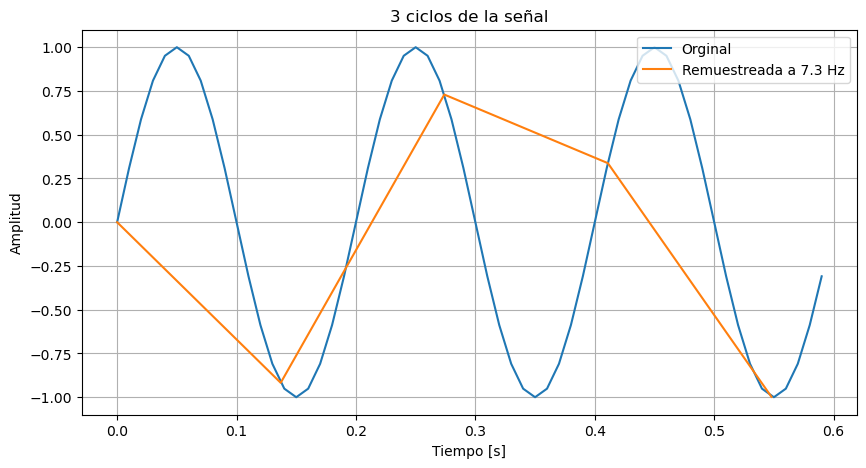

In [11]:
# Grafico los primero 3 ciclos de la señal original y la señal remuestreada

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title(f"{ciclos_a_graficar} ciclos de la señal")

plt.plot(
    vector_tiempo[:cantidad_muestras_tres_ciclos],
    senial[:cantidad_muestras_tres_ciclos],
    '-',
    vector_tiempo_b[:cantidad_muestras_tres_ciclos_b],
    senial_d[:cantidad_muestras_tres_ciclos_b],
    '-'
)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(['Orginal', f'Remuestreada a {frecuencia_muestreo_b} Hz'], loc='upper right')

plt.grid()
plt.show()

Se puede observar en el gráfico que la señal tarda aproximadamente 0.45 segundos en comenzar un nuevo periodo. Esto es equivalente a una frecuencia de 2.22 [Hz]